In [111]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

In [112]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

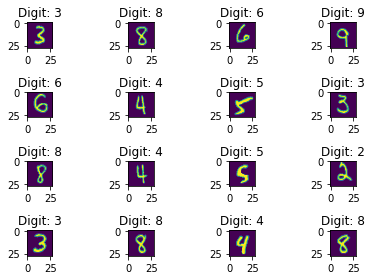

In [113]:
fig = plt.figure()
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(X_train[50000+i])
  plt.title(f"Digit: {y_train[50000+i]}")

In [114]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [115]:
X_train = X_train / 255
X_test = X_test / 255


In [116]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [117]:
y_test = np_utils.to_categorical(y_test, 10)
y_train = np_utils.to_categorical(y_train, 10)

In [118]:
model = Sequential()
model.add(Dense(300, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


In [119]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Nadam')

In [120]:
his = model.fit(X_train, y_train, batch_size = 100, epochs=10, validation_data=(X_test, y_test)) 

Epoch 1/10
600/600 [==============================] - 9s 14ms/step - loss: 0.4980 - accuracy: 0.8526 - val_loss: 0.1155 - val_accuracy: 0.9630
Epoch 2/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1195 - accuracy: 0.9640 - val_loss: 0.0823 - val_accuracy: 0.9729
Epoch 3/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0802 - accuracy: 0.9746 - val_loss: 0.0739 - val_accuracy: 0.9769
Epoch 4/10
600/600 [==============================] - 8s 13ms/step - loss: 0.0604 - accuracy: 0.9801 - val_loss: 0.0734 - val_accuracy: 0.9766
Epoch 5/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0512 - accuracy: 0.9838 - val_loss: 0.0758 - val_accuracy: 0.9769
Epoch 6/10
600/600 [==============================] - 8s 13ms/step - loss: 0.0439 - accuracy: 0.9853 - val_loss: 0.0647 - val_accuracy: 0.9793
Epoch 7/10
600/600 [==============================] - 8s 13ms/step - loss: 0.0396 - accuracy: 0.9861 - val_loss: 0.0658 - val_accuracy: 0.9802

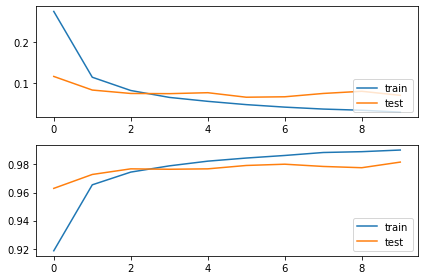

In [121]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(his.history['loss'])
plt.plot(his.history["val_loss"])
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(his.history['accuracy'])
plt.plot(his.history["val_accuracy"])
plt.legend(['train', 'test'], loc='lower right')

plt.tight_layout()

In [122]:
#Evaluating model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Testing Loss of Model = ', loss)
print('Testing Accuracy of Model = ',acc)

Testing Loss of Model =  0.06932522356510162
Testing Accuracy of Model =  0.9817000031471252


In [123]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  
    input_image = tf.cast(input_image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model (input_image)
        loss = loss_object(input_label, prediction)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

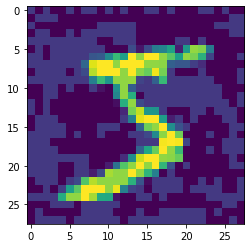

In [124]:
# Get the input label of the image.
image = X_train[0]
label = y_train[0]
perturbations = create_adversarial_pattern(image.reshape(1,784), label.reshape(1,10)).numpy()

adversarial = image + perturbations * 0.1
plt.imshow(adversarial.reshape((28, 28)))


In [125]:
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
print('Actual result is', labels[model.predict(image.reshape((1, 784))).argmax()])
print('Adversarial attack result is', labels[model.predict(adversarial).argmax()])

Actual result is five
Adversarial attack result is three
